### 1. Find the best linear relationship between year and price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\car_age_price.csv')

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
# data set shape
df.shape

(112, 2)

In [5]:
# data set summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
# data set mean,std,min,25%,50%,75%,max
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#data set null value
df.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
#data set columns
df.columns

Index(['Year', 'Price'], dtype='object')

In [9]:
#correlation matrics
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


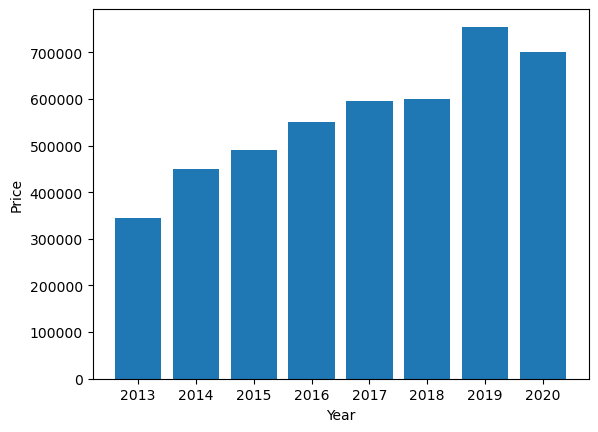

In [10]:
# bar graph plotting
plt.bar(df['Year'],df['Price']);
plt.xlabel('Year');
plt.ylabel('Price');

year and price are positively correlated. above bar graph shows that when year increases the price also increases(proportional).

In [11]:
# x is independent (features), y is target
x=df.drop(['Price'],axis=1)
y=(df['Price'])

In [12]:
x.shape

(112, 1)

In [13]:
y.shape

(112,)

### Linear Regression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# train test splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg=LinearRegression()

In [18]:
# model creation
model=reg.fit(x_train,y_train)

In [19]:
# prediction
y_pred=model.predict(x_test)


In [20]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
# mse and r2_score
print('mse is:', mean_squared_error(y_test,y_pred))
print('r2_score is:', r2_score(y_test,y_pred))

mse is: 4326906256.829671
r2_score is: 0.36759313425902185


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


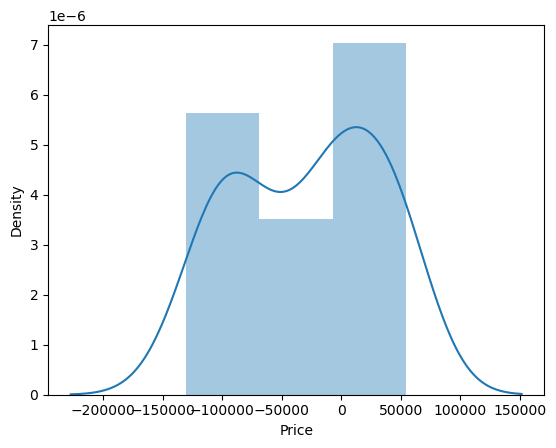

In [23]:
# predicted values and y test values are linearly related
sns.distplot((y_test-y_pred));

best linear relationship between year and price are finded. 

### 2. Predict the possible price of a 2022 model second-hand grand i10?

In [24]:
new=model.predict([[2022]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
new

array([743601.61594504])

The 2022 model second_hand grand i 10  price is743601.61594504

### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1)

In [27]:
lassoy_pred=lasso_reg.predict(x_test)

In [28]:
# predicted values
lassoy_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [34]:
# mse and r2_score
print('mse is:', mean_squared_error(y_test,lassoy_pred))
print('r2_score is:', r2_score(y_test,lassoy_pred))

mse is: 4326859771.015669
r2_score is: 0.3675999284778446


### Ride Regression

In [30]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(x_train,y_train)


Ridge(alpha=1)

In [31]:
ridgey_pred=ridge_reg.predict(x_test)

In [32]:
# predicted values
ridgey_pred

array([600240.76311837, 505462.59797981, 552851.68054909, 552851.68054909,
       552851.68054909, 410684.43284124, 505462.59797981, 552851.68054909,
       600240.76311837, 600240.76311837, 315906.26770268, 505462.59797981,
       410684.43284124, 647629.84568766, 552851.68054909, 600240.76311837,
       315906.26770268, 410684.43284124, 505462.59797981, 505462.59797981,
       505462.59797981, 505462.59797981, 505462.59797981])

In [33]:
# mse and r2_score
print('mse is:', mean_squared_error(y_test,ridgey_pred))
print('r2_score is:', r2_score(y_test,ridgey_pred))

mse is: 4302321945.74978
r2_score is: 0.3711862990270117


linear regression,lasso regression and ridge regression are performed. r2_score is quite large in ridge compare to lasso and linear regressions. 